In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df=pd.read_csv("CAR DETAILS.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [31]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [33]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [35]:
df.duplicated().sum()

763

In [37]:
df=df.drop_duplicates()

In [17]:
df.duplicated().sum()

763

In [39]:

missing_values = df.isnull().sum()

duplicate_rows = df.duplicated().sum()

year_outliers = df[(df['year'] < 1990) | (df['year'] > 2024)]
selling_price_outliers = df[df['selling_price'] < 0]
km_driven_outliers = df[df['km_driven'] < 0]

df_cleaned = df.drop_duplicates()

cleaned_df_info = df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


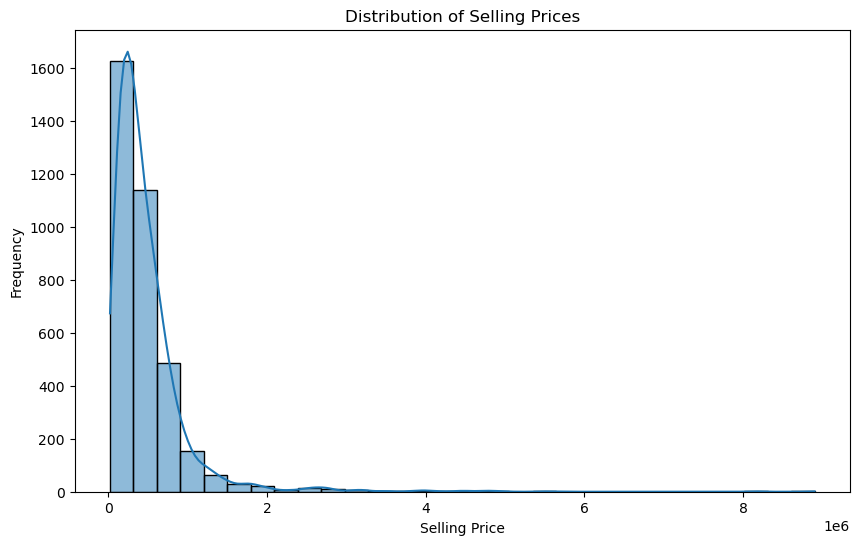

In [152]:
# Distribution of selling prices
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

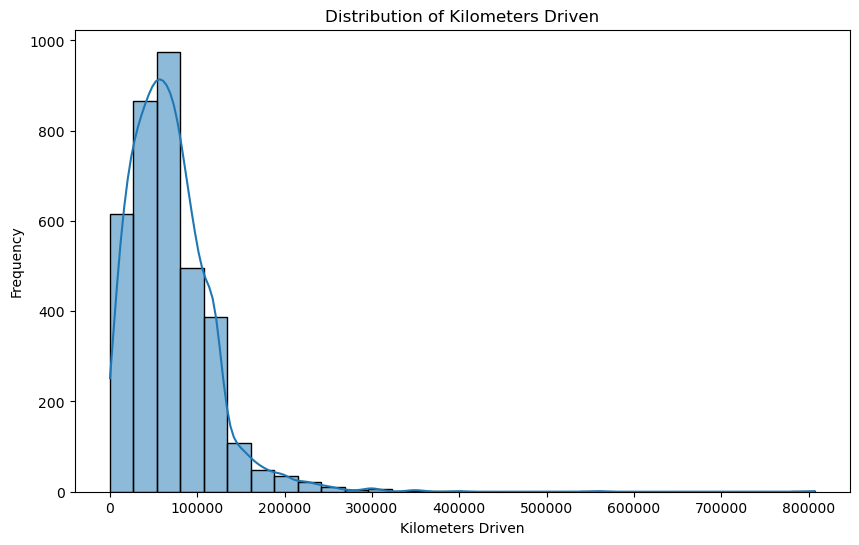

In [154]:
# Distribution of kilometers driven
plt.figure(figsize=(10, 6))
sns.histplot(df['km_driven'], kde=True, bins=30)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

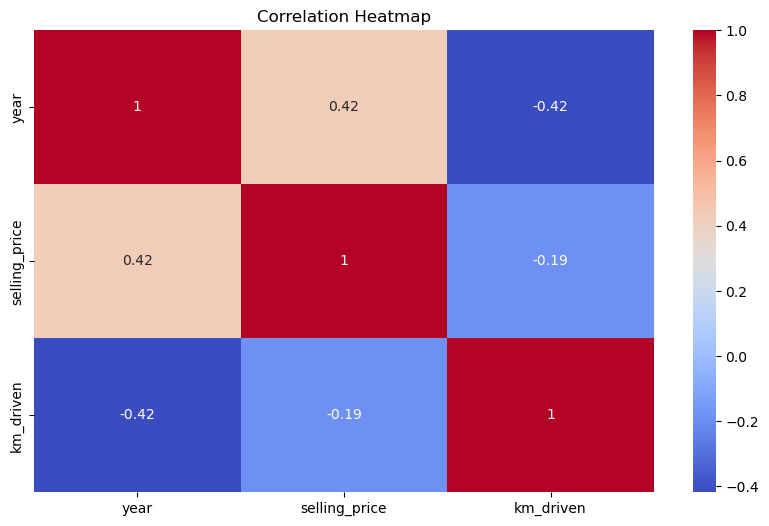

In [156]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [43]:

encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded_categories = encoder.fit_transform(df_cleaned[categorical_cols])
encoded_df = pd.dfFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_cols))

df_processed = pd.concat([df_cleaned[numerical_cols], encoded_df], axis=1)

scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

df_processed.head()


,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-1.402566,-0.812819,0.015754,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.402566,-0.665538,-0.404650,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.226418,0.247604,0.646360,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.949731,-0.439708,-0.488731,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.244042,-0.046958,1.508188,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [129]:

numerical_imputer = SimpleImputer(strategy='mean')
df_cleaned[numerical_cols] = numerical_imputer.fit_transform(df_cleaned[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_cols] = categorical_imputer.fit_transform(df_cleaned[categorical_cols])

df_cleaned.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [127]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack


X = df_cleaned.drop(['selling_price', 'year', 'km_driven'], axis=1)

y = np.array(df_cleaned['selling_price'])

cv = CountVectorizer(lowercase=True, analyzer='word', stop_words='english', max_features=5000)
name_vectorized = cv.fit_transform(X['name'])

X = X.drop('name', axis=1)

X = pd.get_dummies(X, drop_first=True)

X_combined = hstack([name_vectorized, X.values])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R2 Score: {r2_lr}")


Linear Regression - MSE: 167889041723.08347, MAE: 153577.71545280574, R2 Score: 0.4788213037281561


In [146]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R2 Score: {r2_dt}")
print(dt_model.score(X_train, y_train))

Decision Tree - MSE: 181279261806.51233, MAE: 159488.4848382065, R2 Score: 0.437253984180373
0.9780921559371261


In [148]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R2 Score: {r2_rf}")
print(rf_model.score(X_train, y_train))

Random Forest - MSE: 167287660709.59714, MAE: 150146.48436537347, R2 Score: 0.480688173473523
0.9332671738709323


In [150]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100)

gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, MAE: {mae_gb}, R2 Score: {r2_gb}")
print(gb_model.score(X_train, y_train))

Gradient Boosting - MSE: 181004900147.0458, MAE: 195122.56877888972, R2 Score: 0.4381056862957713
0.8003896852039849


In [162]:
import joblib
joblib.dump(dt_model, 'Best_model.pkl')

['Best_model.pkl']